In [2]:
import pandas as pd
import numpy as np
pd.__version__

'0.22.0'

# 3.2 pandasオブジェクトの基礎

## 3.2.1 Seriesオブジェクト

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
data[1]

0.5

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### 3.2.1.1 一般化NumPy配列としてのSeries

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
data['b']

0.5

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['2','5','3','7'])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### 3.2.1.2 特殊辞書としてのSeries

In [11]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict) #Python辞書から直接Seriesオブジェクトを構築する
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [12]:
population['California']

38332521

In [13]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### 3.2.1.3 Seriesオブジェクトの生成

In [14]:
pd.Series([2,4,6])

0    2
1    4
2    6
dtype: int64

In [15]:
pd.Series(5, index=[100,200,300]) #dataにスカラー値を使うと指定されたインデスクを満たすために繰り返される

100    5
200    5
300    5
dtype: int64

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'}) #データに辞書おｗ使うと、デフォルトではソートされたインデクスが優先される

1    b
2    a
3    c
dtype: object

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]) #明示されたインデクスが優先される

3    c
2    a
dtype: object

## 3.2.2 DataFrameオブジェクト

### 3.2.2.1 一般化NumPy配列としてのDataFrame

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [19]:
states = pd.DataFrame({'population':population, 'area':area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [20]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [21]:
states.columns #列ラベルを保持するIndexオブジェクトであるColumns属性を持つ

Index(['area', 'population'], dtype='object')

### 3.2.2.2 特殊辞書としてのDataFrame

In [22]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

### 3.2.2.3 DataFrameオブジェクトの生成

In [23]:
#Seriesから作成する
pd.DataFrame(population, columns=['population']) #1つのSeriesからは1つの列を持つDataFrameを生成できる

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [24]:
#辞書のリストから作成する
data = [{'a':i, 'b':2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [25]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [26]:
#Seriesオブジェクトの辞書から作成する
pd.DataFrame({'population':population, 'area':area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [27]:
#2次元Numpy配列から作成する
pd.DataFrame(np.random.rand(3,2), columns=['foo', 'bar'], index=list('abc'))

,foo,bar
a,0.444540,0.911525
b,0.357290,0.308964
c,0.852267,0.881530


In [28]:
#Numpy構造化配列から作成する
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [29]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## 3.2.3 Indexオブジェクト

In [30]:
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### 3.2.3.1　普遍配列としてのIndex

In [31]:
ind[1]

3

In [32]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [33]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [34]:
#ind[1] = 0 #indexは通常の方法では値を変更できない

TypeError: Index does not support mutable operations

### 3.2.3.2 順序付き集合(set)としてのINdex

In [36]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])

In [37]:
indA & indB #積集合

Int64Index([3, 5, 7], dtype='int64')

In [38]:
indA | indB #和集合

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [39]:
indA ^ indB #対称差

Int64Index([1, 2, 9, 11], dtype='int64')

## 3.3.1 Seriesのデータ選択

### 3.3.1.1 辞書としてのSeries

In [40]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [41]:
data['b']

0.5

In [42]:
'a' in data

True

In [43]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [44]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [45]:
data['e'] = 1.25 #新しいインデクスに値を割り当てるとSeriesが拡張される
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### 3.3.1.2 1次元配列としてのSeries

In [46]:
data['a':'c'] #明示的なインデクスによるスライス

a    0.25
b    0.50
c    0.75
dtype: float64

In [47]:
data[0:2] #間接的な整数インデクスによるスライス
# ※明示的なインデクスの場合最後のインデクスがスライスに含まれるが、間接的なインデクスの場合スライスが含まれない

a    0.25
b    0.50
dtype: float64

In [48]:
data[(data > 0.3) & (data < 0.8)] #マスク

b    0.50
c    0.75
dtype: float64

In [49]:
data[['a', 'b']] #ファンシーインデクス

a    0.25
b    0.50
dtype: float64

### 3.3.1.3 インデクス属性:loc, iloc, ix

In [50]:
data = pd.Series(['a','b','c'], index = [1,3,5])
data

1    a
3    b
5    c
dtype: object

In [51]:
#明示的なindex設定
data[1]

'a'

In [52]:
#スライスの場合の、間接的な指定
data[1:3]

3    b
5    c
dtype: object

In [53]:
#loc:明示的なインデクスを使ったインデクス及びスライス
data.loc[1] 

'a'

In [54]:
data.loc[1:3]

1    a
3    b
dtype: object

In [55]:
#iloc:pythonの間接的なスタイルのインデクスを使ったインデクス及びスライス
data.iloc[1]

'b'

In [56]:
data.iloc[1:3]

3    b
5    c
dtype: object

## 3.3.2 DataFrameのデータ選択

### 3.3.2.1 辞書としてのデータフレーム

In [57]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [58]:
#列名の辞書形式のインデクスを介したアクセス
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [59]:
#属性形式でのアクセス（文字形式の列名の場合）
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [60]:
data.area is data['area']

True

In [61]:
data.pop is data['pop'] #pop()メソッドと競合する

False

In [62]:
data['density'] = data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


### 3.3.2.2 ２次元配列としてのDataFrame

In [63]:
data.values #values属性

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [64]:
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [65]:
data.values[0] #配列形式に対してインデクスを1つ指定すると行がかえる

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [66]:
data['area'] #インデクスを1つ指定すると列がかえる

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [67]:
data.iloc[:3, :2] #iloc属性：暗黙のPythonスタイルのインデクスを使用する

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [68]:
data.loc[:'Illinois',:'pop'] #loc属性：明示したインデクスを使用する

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [69]:
data.ix[:3, :'pop'] #ix属性：2つの方法を組み合わせることが可能

/Users/shoki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [70]:
data.loc[data.density > 100, ['pop', 'density']] #マスクとファンシーインデクス

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


### 3.3.2.3 その他のインデクス規則

In [71]:
#インデクスは列を参照するが、スライスは行を参照する
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [72]:
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [73]:
#マスキング操作も、列ではなく行に対して解釈される
data[data.density > 100]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


# 3.4 pandasデータの操作

## 3.4.1 ufunc:インデクスの保存

In [74]:
import pandas as pd
import numpy as np

In [75]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [76]:
df = pd.DataFrame(rng.randint(0, 10, (3,4)), columns=['a','b','c','d'])
df

,a,b,c,d
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [77]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [78]:
np.sin(df*np.pi/4)

,a,b,c,d
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


## 3.4.2 ufunc:インデクスの整列

### 3.4.2.1 Seriesオブジェクトのインデクス整列

In [79]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [80]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [81]:
area.index | population.index #インデクスの和集合

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [82]:
A = pd.Series([2,4,6], index=[0,1,2])
B = pd.Series([1,3,5], index=[1,2,3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [83]:
A.add(B, fill_value=0) # A+Bと同じだが、fill_valueで欠落値に埋める値を明示する

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### 3.4.2.2 DataFrameオブジェクトのインデクス整列

In [84]:
A = pd.DataFrame(rng.randint(0, 20, (2,2)), columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [85]:
B = pd.DataFrame(rng.randint(0,10,(3,3)), columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [86]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [87]:
fill = A.stack().mean()
A.add(B, fill_value = fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


## 3.4.3 ufunc:DataFrameとSeriesとの演算

In [88]:
A = rng.randint(10, size=(3,4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [89]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [90]:
#ブロードキャストルールにより、2次元配列とその中の１行の減算は、行単位で行われる
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [91]:
#列単位で操作する場合、オブジェクトメソッドにaxisキーワードを指定する
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [92]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [93]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# 3.5 欠損値の扱い

### 3.5.2.1 None:Pythonの欠損値

In [94]:
vals1 = np.array([1,None,3,4])
vals1

array([1, None, 3, 4], dtype=object)

In [95]:
for dtype in ['object','int']:
    print("dtype = ", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()

dtype =  object
96.4 ms ± 5.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
dtype =  int
3.29 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [96]:
#None値を持つ配列全体に対して集約演算を行うとエラーになる
#vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

### 3.5.2.2 NaN:数値データの欠損値

In [97]:
#NaN(Not a Number)は浮動小数点型を選択する
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [98]:
#NaNを使用した算術演算の結果はNaNになる
1 + np.nan

nan

In [99]:
0 * np.nan

nan

In [100]:
#値の集約結果は明確に定義されている（NaNになり、エラーにはならない）
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [101]:
#欠損値を無視する特別なNumPy関数
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

#### 3.5.2.3 pandasにおけるNaNのNone

In [102]:
pd.Series([1,np.nan,2,None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [103]:
#NA値が存在するとpandasは自動的にキャストを行う（NaN値があれば浮動小数点型になる）
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [104]:
#Noneを自動的にNaNに変換する
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## 3.5.3 null値が存在する場合の処理

### 3.5.3.1 null値の検出

In [105]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [106]:
data[data.notnull()]

0        1
2    hello
dtype: object

### 3.5.3.2 欠損値の除外

In [107]:
data.dropna()

0        1
2    hello
dtype: object

In [108]:
df = pd.DataFrame([[1,np.nan,2], [2,3,5],[np.nan,4,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [109]:
#DataFrameでdropna()は、デフォルトではnull値が存在するすべての行を削除する
df.dropna()

,0,1,2
1,2.0,3.0,5


In [110]:
df.dropna(axis=1) #axis=1はnull値を含む全ての列を削除する

,2
0,2
1,5
2,6


In [111]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [112]:
df.dropna(axis='columns', how='all') #すべての値がNaNとなっている列を除く

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [113]:
df.dropna(axis=0, thresh=3) #threshでnull以外の値の最小個数を指定する

,0,1,2,3
1,2.0,3.0,5,NaN


### 3.5.3.3 欠損値の値設定

In [114]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('ABCDE'))
data

A    1.0
B    NaN
C    2.0
D    NaN
E    3.0
dtype: float64

In [115]:
#fillna():NAの要素を1つの値で埋める
data.fillna(0)

A    1.0
B    0.0
C    2.0
D    0.0
E    3.0
dtype: float64

In [116]:
#NAの要素に対して、1つ前の値を埋める
data.fillna(method='ffill')

A    1.0
B    1.0
C    2.0
D    2.0
E    3.0
dtype: float64

In [117]:
#NAの要素に対して、1つ後の値を埋める
data.fillna(method='bfill')

A    1.0
B    2.0
C    2.0
D    3.0
E    3.0
dtype: float64

In [118]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [119]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# 3.6 階層型インデクス

## 3.6.1 多重インデクスを持つSeries

### 3.6.1.1 誤った手法

In [120]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [121]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [122]:
#2010年以降の値をすべて選択する必要がある場合、乱暴な処理を行う必要がある
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### より良い手法：MultiINdex

In [123]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [124]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [125]:
#2番目のインデクスが2010であるデータにアクセスする
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

### 3.6.1.3 多次元に対するMultiINdex

In [126]:
#unstack() 多重インデクスを使ったSeriesを一般的なインデクス付きDataFrameに変換する
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [127]:
#stack() unstack()と逆の動作を行う
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [128]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [129]:
#18歳未満の人口の割合を計算する
f_u18 = pop_df['under18']/pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## 3.6.2 MultiIndexの作成方法

In [130]:
#インデクス配列のリストをコンストラクタに渡す方法
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.822120  0.819463
  2  0.203370  0.936369
b 1  0.453938  0.238032
  2  0.018427  0.098763

In [131]:
#キーとして適切なタプルを持つ辞書を渡す
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### 3.6.2.1 明示的なMultiIndexの作成方法

In [132]:
#配列のリストからMultiIndexを構成する
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [133]:
#タプルのリストからMultiIndexを構成する
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [134]:
#それぞれのインデクスのデカルト積からMultiIndexを構成する
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [135]:
#レベル（レベルごとに使用するインデクス値を含むリストのリスト）とラベル（それぞれのレベルの組み合わせを示すリストのリスト）
#を明示してMultiIndexを構成する
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

### 3.6.2.2 MultiIndexのレベル名

In [136]:
pop.index.names=['state','year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### 3.6.2.3 列に対するMultiIndex

In [137]:
#階層化した列(column)とインデクス(index)
index = pd.MultiIndex.from_product([[2013, 2014], [1,2]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob','Guido','Sue'], ['HR','Temp']], names=['subject', 'type'])

In [138]:
data = np.round(np.random.randn(4,6), 1)
data[:, ::2] *= 10
data += 37

In [139]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  38.5  35.0  39.0  31.0  38.2
     2      59.0  37.3  21.0  37.9  41.0  37.2
2014 1      39.0  37.7  28.0  35.8  48.0  36.7
     2      54.0  37.3  42.0  37.1  24.0  37.3

In [140]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      35.0  39.0
     2      21.0  37.9
2014 1      28.0  35.8
     2      42.0  37.1

## 3.6.3 MultiIndexのインデクス指定とスライス

### 3.6.3.1 多重インデクスSeries

In [141]:
#複数の項目でインデクス指定
pop['California', 2000]

33871648

In [142]:
#部分インデクス指定
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [143]:
#部分的なスライス
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [144]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [145]:
#ブール値マスク
pop[pop>22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [146]:
#ファンシーインデクス
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### 3.6.3.2 多重インデクスDataFrame

In [147]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  38.5  35.0  39.0  31.0  38.2
     2      59.0  37.3  21.0  37.9  41.0  37.2
2014 1      39.0  37.7  28.0  35.8  48.0  36.7
     2      54.0  37.3  42.0  37.1  24.0  37.3

In [148]:
health_data['Guido', 'HR']

year  visit
2013  1        35.0
      2        21.0
2014  1        28.0
      2        42.0
Name: (Guido, HR), dtype: float64

In [149]:
#間接的なインデクス指定
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      34.0  38.5
     2      59.0  37.3

In [150]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        34.0
      2        59.0
2014  1        39.0
      2        54.0
Name: (Bob, HR), dtype: float64

In [152]:
#タプル内のインデクスにはスライスを指定できない
#health_data.loc[(:, 1), (:, 'HR')]


In [153]:
#IndexSliceオブジェクトを操作する
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,34.0,35.0,31.0
2014,1,39.0,28.0,48.0


## 3.6.4 多重インデクスの並べ替え

### ソートされたインデクスとソートされてないインデクス

In [154]:
#インデクスを辞書的にソートしていない多重インデクスデータの作成
index = pd.MultiIndex.from_product([['a','c','b'], [1,2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char','int']
data

char  int
a     1      0.857524
      2      0.080570
c     1      0.483890
      2      0.431210
b     1      0.051673
      2      0.509754
dtype: float64

In [155]:
#MultiIndexがソートされていないため、スライスによる参照の際にエラーになる
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [156]:
#sort_index():インデクスをソートする
data = data.sort_index()
data

char  int
a     1      0.857524
      2      0.080570
b     1      0.051673
      2      0.509754
c     1      0.483890
      2      0.431210
dtype: float64

In [157]:
data['a':'b']

char  int
a     1      0.857524
      2      0.080570
b     1      0.051673
      2      0.509754
dtype: float64

### 3.6.4.2 インデクスのstackとunstack

In [158]:
#unstack():多重インデクスを使ったSeriesをDataFrameに変換する
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [159]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [160]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### インデクスの設定と再設定

In [161]:
#reset_index()もともとインデクスであった応報を保持する列を持つDataFrameを作成する
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [162]:
#set_index():多重インデクス付きのDataFrameを返す
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## 3.6.5 多重インデクスに基づいたデータ集約

In [163]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  38.5  35.0  39.0  31.0  38.2
     2      59.0  37.3  21.0  37.9  41.0  37.2
2014 1      39.0  37.7  28.0  35.8  48.0  36.7
     2      54.0  37.3  42.0  37.1  24.0  37.3

In [164]:
#調査したいインデクスのレベルを指定して平均を求める
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido          Sue      
type       HR  Temp    HR   Temp    HR  Temp
year                                        
2013     46.5  37.9  28.0  38.45  36.0  37.7
2014     46.5  37.5  35.0  36.45  36.0  37.0

# 3.7 データセットの連結：concatとappend

In [165]:
import pandas as pd
import numpy as np

In [166]:
def make_df(cols, ind):
    #DataFrameの簡易作成関数
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [167]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


## 3.7.1 再掲：NumPy配列の連結

In [168]:
x = [1,2,3]
y = [4,5,6]
z = [7,8,9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [169]:
x = [[1,2],[3,4]]
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## 3.7.2 pd.concatを使った単純な構造

In [170]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1,2,3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4,5,6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [171]:
df1 = make_df('AB', [1,2])
df2 = make_df('AB', [3,4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [172]:
#列単位での連結
df3 = make_df('AB', [0,1])
df4 = make_df('CD', [0,1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


### 3.7.2.1 インデクスの重複 

In [173]:
#重複するインデクスを持っていても、concatではインデクスが保持される
x = make_df('AB', [0,1])
y = make_df('AB', [2,3])
y.index = x.index
print(x); print(y); print(pd.concat([x,y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [174]:
#重複をエラーとして補足する
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError", e)

ValueError Indexes have overlapping values: [0, 1]


In [175]:
#インデクスを無視する
print(x); print(y); print(pd.concat([x,y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [176]:
#Multiindexキーを追加する
print(x); print(y); print(pd.concat([x,y], keys=['x','y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


### 3.7.2.2 Joinによる連結

In [177]:
df5  = make_df('ABC', [1,2])
df6 = make_df('BCD', [3,4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [178]:
#join='inner'で積集合に変換
print(df5); print(df6); print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [179]:
#使用する列を直接指定
print(df5); print(df6); print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


### 3.7.2.3 appendメソッド

In [180]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


# 3.8 データセットの結合 mergeとjoin

## 3.8.2 結合の種類

### 3.8.2.1 1対1結合

In [181]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [182]:

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [183]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### 3.8.2.2 多対1結合

In [184]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### 3.8.2.3 多対多結合

In [185]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


## 3.8.3 キーの指定

### 3.8.3.1 onキーワード

In [186]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')") #on:キーを明示的に指定する

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### 3.8.3.2 left_onとright_onキーワード

In [187]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [188]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### 3.8.3.3 left_indexキーワードとright_indexキーワード

In [189]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [190]:
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)") 

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [191]:
#joinメソッドはDataFrameでインデクスをキーとした結合を実行する
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [192]:
#left_indexとright_onを組み合わせれば、列とインデクスの混在した指定が可能
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

## 3.8.4 結合に対する集合演算の指定

In [193]:
#デフォルトでは結合時に内部げ都合(innner join)が指定される
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [194]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [195]:
#howキーワードにはその他にouter, left, rightが指定可能
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

## 3.8.5 列名の重複：suffixesキーワード

In [196]:
#列名が重複する場合、接尾辞_xまたは_yを自動的に付加する
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [197]:
#suffixesキーワードで接尾辞を指定可能
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

## 3.8.6 事例：米国州データ

In [198]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) error:140770FC:SSL routines:SSL23_GET_SERVER_HELLO:unknown protocol
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) error:140770FC:SSL routines:SSL23_GET_SERVER_HELLO:unknown protocol
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) error:140770FC:SSL routines:SSL23_GET_SERVER_HELLO:unknown protocol


In [199]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [200]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [201]:
#不一致があったかどうかを確認する
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [202]:
#不一致になっている行のデータを見る
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [203]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [204]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [205]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [206]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [207]:
#areaのどの列にnullアタいが入っているかを調べる
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [208]:
final.dropna(inplace=True)

In [209]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [210]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [211]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [212]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

# 3.9 集約とグループ化

In [213]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## 3.9.1 惑星データ

In [214]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [215]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## 3.9.2 pandasによる単純な制約

In [216]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [217]:
ser.sum()

2.811925491708157

In [218]:
ser.mean()

0.5623850983416314

In [219]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [220]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [221]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [222]:
planets.dropna().describe() #describe()は各列の様々な集約結果を表す

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## 3.9.3 GroupBy：分割、適用、結合

### 3.9.3.1 分割、適用、集合

In [223]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [225]:
#df.groupby('key')　#グループ別操作を行うまで静止する

In [226]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### 3.9.3.2 GroupByオブジェクト

In [227]:
planets.groupby('method')

In [228]:
planets.groupby('method')['orbital_period'] #元のDataFrameから特定のSeriesグループを抽出

In [229]:
#列インデクス
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [230]:
#グループごとの繰り返し
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [231]:
#メソッド呼び出し
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

### 3.9.3.3 集約、フィルタ、変換、適用

In [232]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [233]:
#集約
#aggregate()メソッド:すべての集約を一度に計算可能
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [234]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [235]:
#フィルタ
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

In [236]:
#変換
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [237]:
#適用
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


### 3.9.3.4 分割キーの指定

In [238]:
#リスト、配列、Series、Indexによるグループキーの指定
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

In [239]:
#indexをグループにマップするSeriesおよび辞書
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

In [240]:
#indexをグループにマップするSeries及び辞書
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


In [241]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


In [242]:
#キーのリスト
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### 3.9.3.5 グループ化の例

In [243]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# 3.10 ピボットテーブル

## 3.10.1 ピボットテーブルの必要性

In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [245]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3.10.2 ピボットテーブルのマニュアル作成

In [246]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [247]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## 3.10.3 ピボットテーブルの文法

In [248]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 3.10.3.1 多重ピボットテーブル

In [249]:
#pd.cut():境界値を指定して分類する
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [250]:
#pd.qcut():指定した値等分する
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

### 3.10.3.2 その他のピボットテーブルオプション

aggfunc : 使用する集約の種類を制御（default:mean)

In [251]:
#aggfunc : 使用する集約の種類を制御（default:mean)
#df.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

## 3.10.4 事例:出生率データ

In [252]:
#!curl -0 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [253]:
births = pd.read_csv('births.csv')

In [254]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [255]:
#decadeの列を追加する
births['decade']=10*(births['year'] // 10)

In [256]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

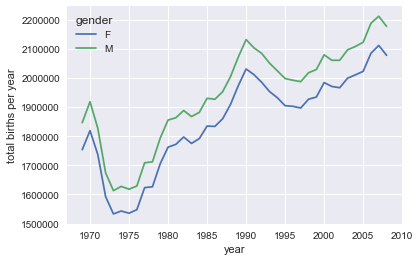

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

### 3.10.4.1 さらなるデータの探索

In [258]:
#シグマクリップ
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [259]:
sig

689.31

In [260]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [261]:
#day列に整数を設定する
births['day'] = births['day'].astype(int)

In [262]:
#年月日を組み合わせた日付をインデクスとする
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [263]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


Text(0,0.5,'mean births by day')

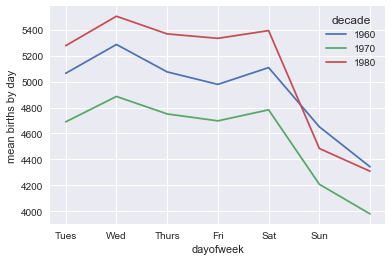

In [264]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [265]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [266]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


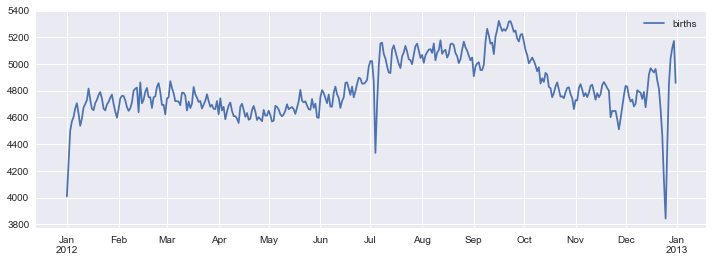

In [267]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# 3.11 文字列操作のベクトル化

## 3.11.1 pandas文字列操作の基礎

In [268]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [269]:
data = ['peter', 'paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [272]:
#data = ['peter', 'paul', None, 'gUIDO']
#[s.capitalize() for s in data]

In [273]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     paul
2     None
3    gUIDO
dtype: object

In [274]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3    Guido
dtype: object

## 3.11.2 Pandas文字列操作メソッドの一覧

In [275]:
monte = pd.Series(['Graham Champman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])

### 3.11.2.1 Pythonの文字列メソッドと同様のメソッド

Pythonの文字列メソッドと同じ名前を持つPandasのstrメソッド
len()	lower()	translate()	islower()
ljust()	upper()	startswith()	isupper()
rjust()	find()	endswith()	isnumeric()
center()	rfind()	isalnum()	isdecimal()
zfill()	index()	isalpha()	split()
strip()	rindex()	isdigit()	rsplit()
rstrip()	capitalize()	isspace()	partition()
lstrip()	swapcase()	istitle()	rpartition()
Notice that these have various return values. Some, like lower(), return a series of strings:

In [276]:
monte.str.lower() #str.lower():文字列を小文字にしたシリーズを返す

0    graham champman
1        john cleese
2      terry gilliam
3          eric idle
4        terry jones
5      michael palin
dtype: object

In [277]:
monte.str.len() #str.len(): 文字数を返す

0    15
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [278]:
monte.str.startswith('T') #str.startwith(): 指定した文字から始まるかを判定するブール値を返す

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [279]:
monte.str.split() #str.split(): 半角スペースで区切ったリストを返す

0    [Graham, Champman]
1        [John, Cleese]
2      [Terry, Gilliam]
3          [Eric, Idle]
4        [Terry, Jones]
5      [Michael, Palin]
dtype: object

### 3.11.2.2 正規表現を使用するメソッド

In [280]:
monte.str.extract('([A-Za-z]+)') #ファーストネームを抽出

/Users/shoki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [281]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$') #子音で始まり子音で終わるすべての名前を見つける

0    [Graham Champman]
1                   []
2      [Terry Gilliam]
3                   []
4        [Terry Jones]
5      [Michael Palin]
dtype: object

### 3.11.2.3 その他のメソッド

In [282]:
#ベクトル化要素の取り出しとスライス
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [283]:
monte.str.split().str.get(-1) #各要素の最後の部分を抽出する

0    Champman
1      Cleese
2     Gilliam
3        Idle
4       Jones
5       Palin
dtype: object

In [284]:
#インジゲータ変数
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Champman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [285]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# 3.12 時系列

## 3.12.1 Pythonの日付と時刻

### 3.12.1.1 Python組み込みの日付と時刻：datetimeとdateutil

In [286]:
#手動で日付オブジェクトを作成する
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [287]:
#様々な形式の文字列日付をパースする
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [288]:
date.strftime('%A')

'Saturday'

### 3.12.1.2 時間の型付き配列：NumPyのdatetime64

In [289]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [290]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [291]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [292]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [293]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

### 3.12.1.3 pandasの日付と時刻：両者のいいとこ取り

In [294]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [295]:
date.strftime('%A')

'Saturday'

In [296]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## 3.12.2 pandasの時系列：時刻によるインデクス

In [297]:
#時間をインデクスとするSeriesオブジェクト
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [298]:
data['2014-07-04':'2015-07-14']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

## 3.12.3 pandasの時系列データ構造

In [299]:
#pd.to_datetime(): 1つの日付を渡すとTimestamp、一連の日付を渡すとデフォルトでDatetimeIndexが生成される
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [300]:
#pd.to_period(): DatetimeIndexをPeriodIndexに変換する
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [301]:
#TimedeltaIndexは、例えばある日付から別の日付を減じたときに生成される
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 3.12.3.1 規則的なシーケンス：pd.date_range()

In [302]:
#pd.date_range(): 開始日から終了日のシーケンスを作成する（デフォルトは1日ずつ）
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [303]:
#開始日と期間を指定して日付範囲を作成することも可能
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [304]:
#freq引数を変更すると感覚を変更できる（デフォルト：D）
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [305]:
#pd.period_range(): 規則的な期間を作成する

pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [306]:
#pd.timedelta_range(): 規則的な時間差の範囲を作成する
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## 頻度とオフセット

pandas頻度コード

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | 日時        | ``B``  | 毎営業日         |
| ``W``  | 週次              |        |                      |
| ``M``  | 月次           | ``BM`` | 月の最終営業日毎   |
| ``Q``  | 四半期末毎         | ``BQ`` | 四半期の最終営業日毎 |
| ``A``  | 年末毎            | ``BA`` | 年度末営業日毎    |
| ``H``  | 毎時               | ``BH`` | 営業時間毎       |
| ``T``  | 毎分             |        |                      |
| ``S``  | 毎秒             |        |                      |
| ``L``  | 毎ミリ秒         |        |                      |
| ``U``  | 毎マイクロ秒        |        |                      |
| ``N``  | 毎ナノ秒         |        |                      |

| Code    | Description            || Code    | Description            |
|---------|------------------------||---------|------------------------|
| ``MS``  | 毎月初           ||``BMS``  | 月の営業開始日毎   |
| ``QS``  | 四半期の開始日毎          ||``BQS``  | 四半期の営業開始日毎 |
| ``AS``  | 毎年始             ||``BAS``  | 毎年営業開始日    |

3桁の付きコードを接尾辞に追加して四半期・年を開始する月を指定する

- ``Q-JAN``, ``BQ-FEB``, ``QS-MAR``, ``BQS-APR``, etc.
- ``A-JAN``, ``BA-FEB``, ``AS-MAR``, ``BAS-APR``, etc.

3文字の曜日コードを追加して週別頻度の開始曜日を指定する
- ``W-SUN``, ``W-MON``, ``W-TUE``, ``W-WED``, etc.

In [ ]:
pd.timedelta_range(0, periods=9, freq="2H30T")

In [308]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq= BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## 3.12.5 再サンプリング、シフト、窓

※非対応のためソースコードのみ
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='google')
goog.head()

## 3.12.6 さらに学ぶために

## 3.12.7 事例：シアトル市の自転車数を可視化する

In [318]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1454k    0 1454k    0     0   137k      0 --:--:--  0:00:10 --:--:--  188k


In [33]:
import pandas as pd
import numpy as np
data = pd.read_csv('FremontBridge.csv', index_col = 0, parse_dates=[0])
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [40]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')


In [41]:
data.dropna().describe()

,West,East,Total
count,51807.000000,51807.000000,51807.000000
mean,57.614666,53.733820,111.348486
std,83.327468,69.988632,140.091927
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,61.000000
75%,70.000000,71.000000,146.000000
max,717.000000,698.000000,957.000000


### 3.12.7.1 データの可視化

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

Text(0,0.5,'Hourly Bicycle Count')

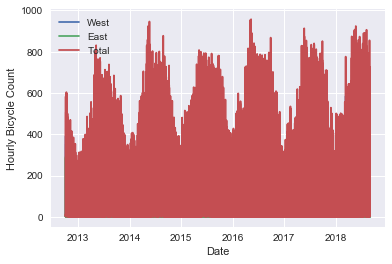

In [43]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

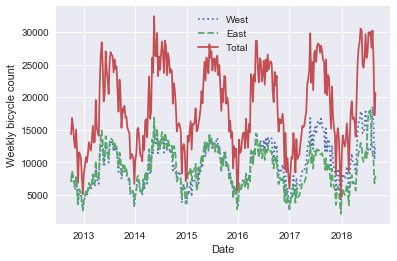

In [44]:
#週ごとのデータに再サンプリングする
weekly = data.resample('W').sum()
weekly.plot(style = [':', '--', '-'])
plt.ylabel('Weekly bicycle count');

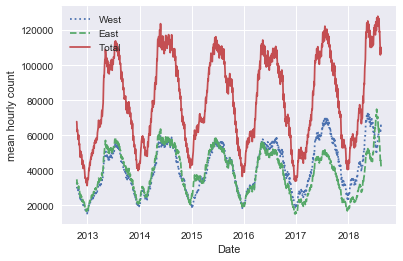

In [45]:
#pd.rolling_mean()関数：移動平均を計算する
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

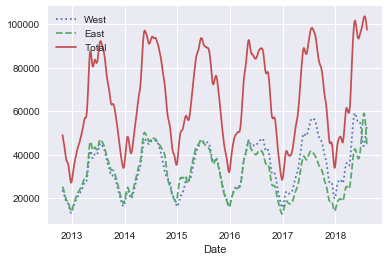

In [46]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':','--','-']);

### 3.12.7.2　データの掘り下げ

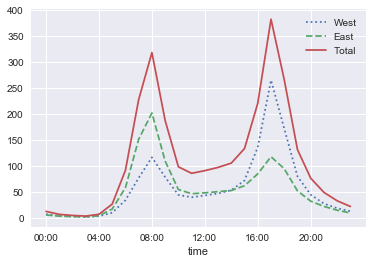

In [47]:
#時間毎の通行量を求める
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style=[':', '--', '-'])

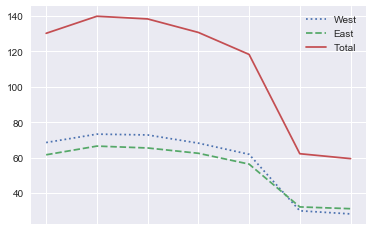

In [48]:
#曜日ごとの通行量を求める
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':', '--', '-']);

In [49]:
#平日と週末の時間的傾向を観る
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

/Users/shoki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shoki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


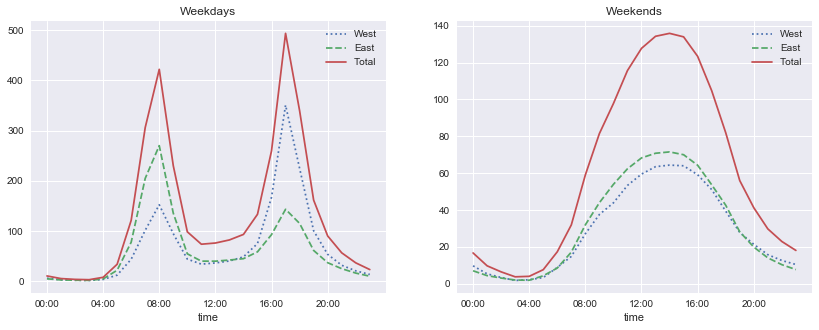

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])

# 3.13 ハイパフォーマンスpandas: eval()とquery()

## 3.13.1 query()とeval()の必要性:複合表現

In [52]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

3.6 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype = x.dtype, count=len(x))

267 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
mask = (x > 0.5) & (y < 0.5)

In [55]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [57]:
#Numexprライブラリは、中間結果の割当を行わず、この朱の複合表現要素を要素ごとに計算する
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

## 3.13.2 pandas.eval()による効率的実行

In [58]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [59]:
%timeit df1 + df2 + df3 + df4

110 ms ± 3.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
#単純な加算式に比べて、実行速度が早い
%timeit pd.eval('df1 + df2 + df3 + df4')

52.8 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

In [62]:
#算術演算子
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [63]:
#比較演算子
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [64]:
#ビット演算子
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [65]:
#ブール演算子
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [66]:
#オブジェクトの属性とインデクス
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

## 3.13.3 DataFrame.eval()による列単位の操作


In [67]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [68]:
#pd.eval(): 3つの列に対する式を次のように計算する
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [70]:
#df.eval(); 列名を使って簡潔に式を評価する
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

### 3.13.3.1 Dataframe.eval()を使った代入

In [71]:
df.head()

,A,B,C
0,0.375506,0.406939,0.069938
1,0.069087,0.235615,0.154374
2,0.677945,0.433839,0.652324
3,0.264038,0.808055,0.347197
4,0.589161,0.252418,0.557789


In [73]:
#新しい列Dを作成する
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [74]:
#既存の列を変更する
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,-0.449425
1,0.069087,0.235615,0.154374,-1.078728
2,0.677945,0.433839,0.652324,0.374209
3,0.264038,0.808055,0.347197,-1.566886
4,0.589161,0.252418,0.557789,0.603708


### 3.13.3.2 DataFrame.eval()内のローカル変数

In [75]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

### 3.13.4 DataFrame.query()メソッド

In [80]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [79]:
#query(): 文字列を評価する
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [81]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True